# Methodology key section
## Data verzameling en beschrijving van de data
## Hoe is de data verzameld
## Wat staat er in de data

In de data is allerlei informatie terug te vinden over de scores van verschillende scholen. Elke rij is een school en per school is er informatie te zien, zoals de gemeente waar de school bij hoort, plaats, type score, score, verwachte score. Niet alle informatie is voor ons relevant. Wij houdenons bezig met de cito scores, dus de scores van andere toetsen (bijv. LVS) moeten uit de data worden gehaald. In de
## Hoe gaan we de vraag beantwoorden

We gaan proberen de vraag te beantwoorden door te kijken naar de prestaties van de type scholen, dit is dus niet alleen op basis van wie de hoogste score haalt, maar ook welke scholen veel verbetering hebben gezien in de laatste jaren. Er wordt dus gekeken naar hoe hoog de scholen scoren op basis van het gemiddelde en ook naar hoeveel verbetering er is te zien bij deze scholen. Hiernaast wordt er een voorspelling gedaan 
## Appendix

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# data inlezen
data = pd.read_csv('RTLNieuwseindtoetscijfers2015.csv', sep=';', decimal=",")
# de relevante kolommen selecteren
clean_data = data.loc[:,['LEERJAAR_8','PLAATSNAAM', 'TOETS_2013','SCORE_2013','TOETS_2014','SCORE_2014','TOETS_2015','SCORE_2015','verwachtecito','DENOMINATIE_VESTIGING']]
clean_data.head()

# de incomplete rijen verwijderen
clean_data = clean_data[clean_data.SCORE_2013 != '#LEEG!']
clean_data = clean_data[clean_data.SCORE_2014 != '#LEEG!']
clean_data = clean_data[clean_data.SCORE_2015 != '#LEEG!']
# alleen rijen gebruiken die CITO scores bevatten
clean_data = clean_data[clean_data.TOETS_2013 == 'cito']
clean_data = clean_data[clean_data.TOETS_2014 == 'cito']
clean_data = clean_data[clean_data.TOETS_2015 == 'Cito']
clean_data = clean_data[clean_data.verwachtecito != '#LEEG!']
# alleen rijen gebruiken die meer dan 5 leerlingen hebben die de cito toets hebben gedaan
clean_data = clean_data[clean_data.LEERJAAR_8 > 5]
# de comma's in punten veranderen zodat de data bruikbaar wordt
clean_data['SCORE_2013'] = clean_data['SCORE_2013'].str.replace(',','.')
clean_data['SCORE_2014'] = clean_data['SCORE_2014'].str.replace(',','.')
clean_data['SCORE_2015'] = clean_data['SCORE_2015'].str.replace(',','.')
# opnieuw de benodigde kolommen selecteren
clean_data = clean_data.loc[:,['LEERJAAR_8','PLAATSNAAM', 'SCORE_2013','SCORE_2014','SCORE_2015','verwachtecito','DENOMINATIE_VESTIGING']]



clean_data.sort_values(by='SCORE_2015',ascending=False).head()

,LEERJAAR_8,PLAATSNAAM,SCORE_2013,SCORE_2014,SCORE_2015,verwachtecito,DENOMINATIE_VESTIGING
312,51,BUSSUM,547.2,545.9,546.2,"539,7470347",Algemeen bijzonder
363,28,'S-GRAVENHAGE,544.7,545.4,546.0,"539,5965154",Algemeen bijzonder
317,7,WINTERSWIJK MISTE,544.4,540.2,545.7,"536,043378",Openbaar
397,33,HILVERSUM,544.2,544.7,545.7,"539,4962388",Algemeen bijzonder
308,9,STEENSEL,538.9,546.0,545.6,"536,8347325",Rooms-Katholiek


### 1. Wat zijn de top 10 scholen in 2015 die het meest verbeterd zijn in vergelijking met 2013 gebaseerd op denominatie? En welke het minst?

met andere woorden, welke denominatie heeft de meeste verbetering?

In [74]:
# we need to know which school had the best improvement between 2013 and 2015.
# so, 2015 minus 2013 should give us the difference.
data_1 = clean_data.loc[:,['DENOMINATIE_VESTIGING','SCORE_2013','SCORE_2015']]
# add the column 'DIFFERENCE'
data_1['IMPROVEMENT'] = data_1['SCORE_2015'].astype(float) - data_1['SCORE_2013'].astype(float)

    
data_1.sort_values(by='IMPROVEMENT',ascending=False)[:10]

# group by denomination and sort by improvement rating
grouped = data_1.groupby(['DENOMINATIE_VESTIGING']).mean().sort_values(by='IMPROVEMENT',ascending=False)
grouped

,IMPROVEMENT
DENOMINATIE_VESTIGING,
Hindoeistisch,3.320000
Joods,2.200000
Evangelisch,1.375000
Islamitisch,0.826471
Gereformeerd vrijgemaakt,0.792647
Interconfessioneel,0.500000
Rooms-Katholiek,0.375583
Openbaar,0.216815
Reformatorisch,0.178378


In [79]:
# verdeling type scholen
num_group = data_1.loc[:,['DENOMINATIE_VESTIGING','IMPROVEMENT']]
num_group = num_group.groupby(['DENOMINATIE_VESTIGING']).count()
print 'Verdeling aantal type scholen'
num_group.sort_values(by='IMPROVEMENT',ascending=False)


Verdeling aantal type scholen


,IMPROVEMENT
DENOMINATIE_VESTIGING,
Rooms-Katholiek,1544
Openbaar,1457
Protestants-Christelijk,1108
Algemeen bijzonder,179
Reformatorisch,111
Gereformeerd vrijgemaakt,68
"Samenwerking PC, RK",37
Islamitisch,34
Antroposofisch,6


### Hoeveel scholen zien verbetering?

In [48]:
data_1.head()
num_improved = 0
num_not_improved = 0

for x in data_1['IMPROVEMENT']:
    if x > 0:
        
        num_improved += 1
    else:
        num_not_improved += 1
        
total = num_improved + float(num_not_improved)
print "Percentage scholen die verbetering zien ten opzichte van 2013: ", (num_improved/total)*100.0,"%"

Percentage scholen die verbetering zien ten opzichte van 2013:  51.5775635408 %


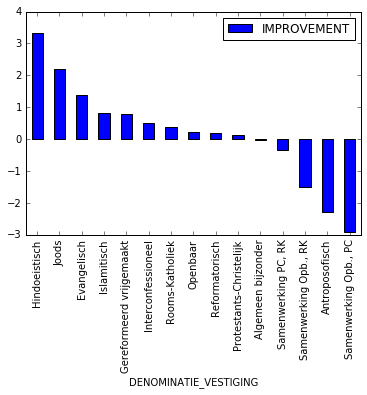

In [49]:
grouped.plot(kind='bar')

### 2. In hoeverre heeft de denominatie (katholiek, protestants etc.) invloed op de citoscore?

Score vanaf de 525 grens


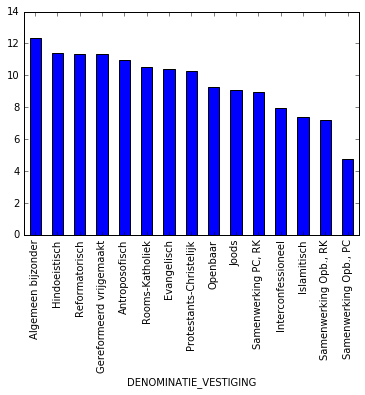

In [65]:
data_2 = data_1.loc[:,['DENOMINATIE_VESTIGING', 'SCORE_2015']]
data_2['SCORE_2015'] = data_2['SCORE_2015'].astype(float)
data_2 = data_2.groupby(['DENOMINATIE_VESTIGING']).mean().sort_values(by='SCORE_2015',ascending=False)

print "Score vanaf de 525 grens"
data_2['SCORE_2015(VANAF 525)'] = data_2['SCORE_2015'] -525
data_2['SCORE_2015(VANAF 525)'].plot(kind='bar')

### 3. Een voorspelling gebaseerd op de veranderingen van 2013 t/m 2015 gebaseerd op denominatie



In [66]:
"""
t1 = 15
t2 = 16
t3 = 10

differences t1 and t2 = 1
differences t2 and t3 = -6
mean of the difference is -2,5

so t4 = t3+ ((t2-t1)+(t3-t2))/2
"""
data_3 = clean_data
data_3['VOORSPELLING'] = data_3['SCORE_2015'].astype(float) +((data_3['SCORE_2014'].astype(float) - data_3['SCORE_2013'].astype(float)) + (data_3['SCORE_2015'].astype(float) - data_3['SCORE_2014'].astype(float)))/2

data_3.head()

,LEERJAAR_8,PLAATSNAAM,SCORE_2013,SCORE_2014,SCORE_2015,verwachtecito,DENOMINATIE_VESTIGING,VOORSPELLING
267,7,VENLO,540.6,536.2,542.4,"528,3563601",Rooms-Katholiek,543.30
269,28,STAPHORST,542.5,543.2,543.0,"532,7647087",Reformatorisch,543.25
272,15,ACHTERVELD,549.2,545.5,539.4,"535,2224858",Openbaar,534.50
273,21,'S-GRAVENHAGE,537.7,539.2,541.9,"530,4942465",Algemeen bijzonder,544.00
274,39,RAALTE,545.7,545.2,544.0,"536,1585287",Openbaar,543.15


In [85]:
voorspelling = data_3.groupby(['DENOMINATIE_VESTIGING']).mean().loc[:,['VOORSPELLING']].sort_values(by='VOORSPELLING',ascending=False)
voorspelling

,VOORSPELLING
DENOMINATIE_VESTIGING,
Hindoeistisch,538.060000
Algemeen bijzonder,537.348603
Gereformeerd vrijgemaakt,536.727206
Reformatorisch,536.450450
Evangelisch,536.062500
Rooms-Katholiek,535.696017
Protestants-Christelijk,535.331047
Joods,535.150000
Antroposofisch,534.783333


### 4. Welke scholen in Nederland hebben de laagste kwaliteit?

In [67]:
# kwaliteit is dus een score vanaf gemiddelde meten

data_4 = clean_data.loc[:,['DENOMINATIE_VESTIGING','SCORE_2015']]
# difference between score 2015 and the mean
data_4['KWALITEIT'] = data_4['SCORE_2015'].astype(float) - data_4['SCORE_2015'].astype(float).mean()

data_4.sort_values(by='KWALITEIT',ascending=True).head()

,DENOMINATIE_VESTIGING,SCORE_2015,KWALITEIT
6590,Rooms-Katholiek,514.7,-20.418931
6617,Openbaar,515.1,-20.018931
6597,"Samenwerking PC, RK",518.9,-16.218931
6612,Openbaar,519.1,-16.018931
6476,Openbaar,519.2,-15.918931


### Welke scholen in Nederland hebben de hoogste kwaliteit?

In [53]:
data_4.sort_values(by='KWALITEIT',ascending=False).head()

,DENOMINATIE_VESTIGING,SCORE_2015,KWALITEIT
312,Algemeen bijzonder,546.2,11.081069
363,Algemeen bijzonder,546.0,10.881069
317,Openbaar,545.7,10.581069
397,Algemeen bijzonder,545.7,10.581069
308,Rooms-Katholiek,545.6,10.481069


### 5. En gebaseerd op denominatie?

In [68]:
grouped2 = data_4.groupby(['DENOMINATIE_VESTIGING']).mean().sort_values(by='KWALITEIT',ascending=False)
grouped2

,KWALITEIT
DENOMINATIE_VESTIGING,
Algemeen bijzonder,2.240287
Hindoeistisch,1.281069
Reformatorisch,1.242330
Gereformeerd vrijgemaakt,1.211952
Antroposofisch,0.814403
Rooms-Katholiek,0.389295
Evangelisch,0.256069
Protestants-Christelijk,0.143163
Openbaar,-0.841443


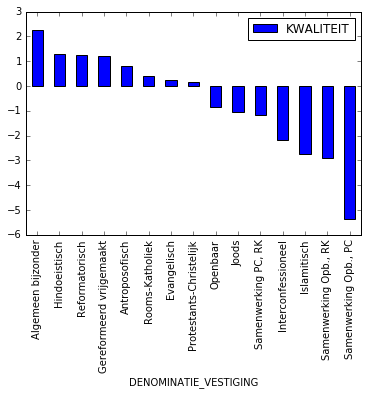

In [69]:
grouped2.plot(kind='bar')